In [119]:
import os
import numpy as np
import pandas as pd
import time as time
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
from PIL import Image

In [120]:
def calculateHighest(pixel_data, width, height):
    """
    [0]Red; [1]Blue; [2]Green; [3]Transparency
    :param pixel_data:
    :param width:
    :param height:
    :return: maximum value of transparency from A band, for this case this should be the 100% of intensity of touch
    """
    total = []
    input_pixel = pixel_data
    for i in range(int(width)):  # for every col:
        for j in range(int(height)):  # for every row:
            alpha_value = input_pixel[i, j][3] / 255  # read data from the A band
            total.append(alpha_value)
    maximum = max(total)
    return maximum

In [121]:
def intensityNormalization(pixel_data, maximum):
    """

    :param pixel_data:
    :param maximum:
    :return:
    """

    input_pixel = pixel_data
    alpha_value = input_pixel[3] / 255
    new_r = int(input_pixel[0])
    new_b = int(input_pixel[1])
    new_g = int(input_pixel[2])
    new_a = int((alpha_value * 100 / maximum))
    new_pixel = (new_r, new_b, new_g, new_a)
    return new_pixel

In [122]:
def draw_outline(outline, input_name):
    """

    :param outline:
    :param input_name:
    :return:
    """
    new = Image.open('output/merge/' + name + ".png")
    resized_image = new.resize((400, 300))

    plt.figure(1)
    plt.imshow(resized_image, cmap='Reds')
    plt.colorbar(label="Touch intensity")
    plt.imshow(outline)
    plt.savefig('output/outline/' + input_name + ".png", format="png")
    plt.show()

In [123]:
dir1 = 'source/data_pilot/Men Preferred Love/'
dir2 = 'source/data_pilot/Men Preferred Sex/'
dir3 = 'source/data_pilot/Men Received Love/'
dir4 = 'source/data_pilot/Men Received Sex/'
dir5 = 'source/data_pilot/Women Preferred Love/'
dir6 = 'source/data_pilot/Women Preferred Sex/'
dir7 = 'source/data_pilot/Women Received Love/'
dir8 = 'source/data_pilot/Women Received Sex/'

target_outline = ['source/img/malebody400300.png', 'source/img/femalebody400300.png']

all_dir = [dir1, dir2, dir3, dir4, dir5, dir6, dir7, dir8]

Working on " Men Preferred Love "


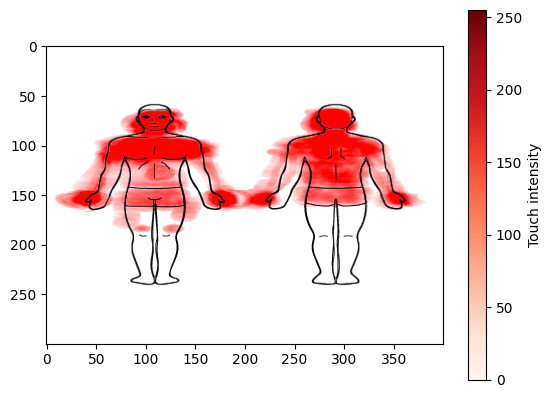

Working on " Men Preferred Sex "


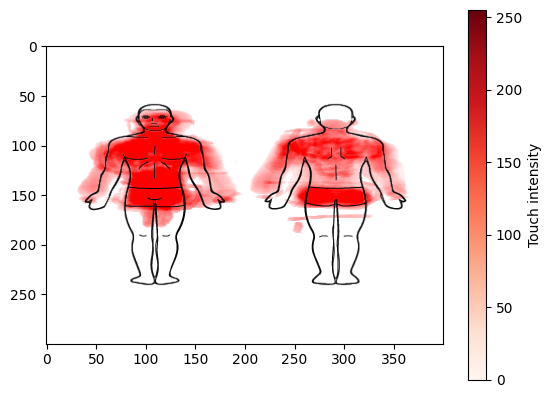

Working on " Men Received Love "


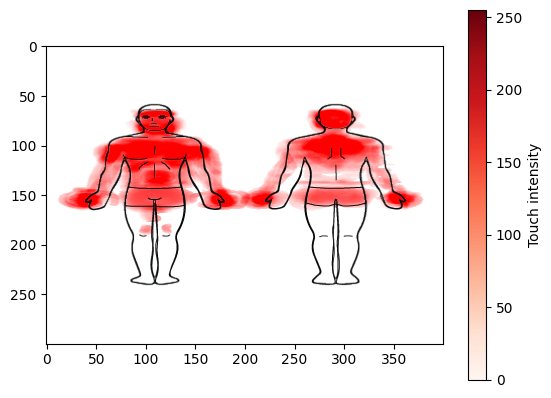

Working on " Men Received Sex "


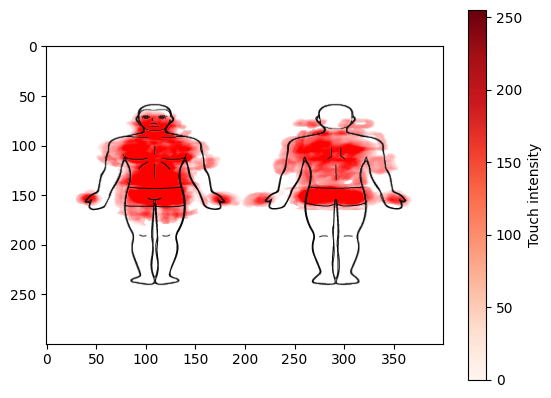

Working on " Women Preferred Love "


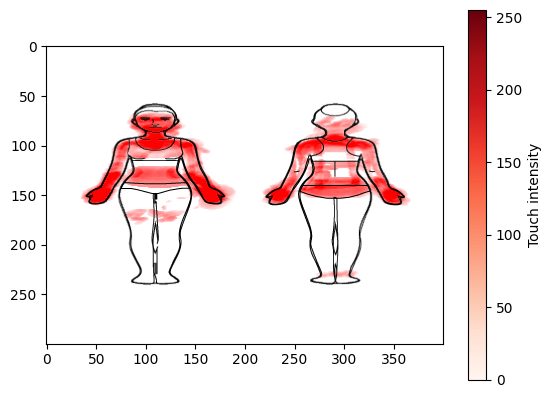

Working on " Women Preferred Sex "


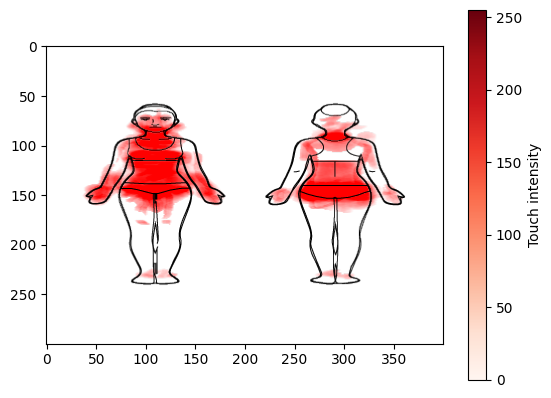

Working on " Women Received Love "


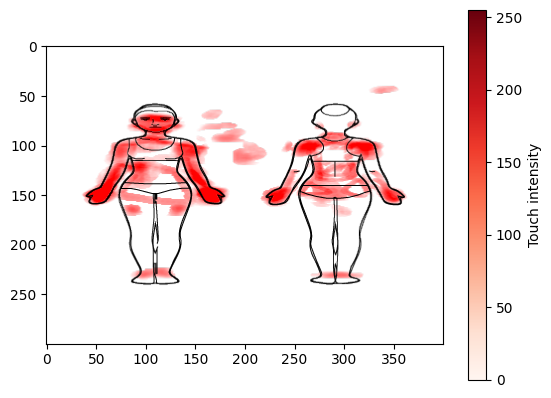

Working on " Women Received Sex "


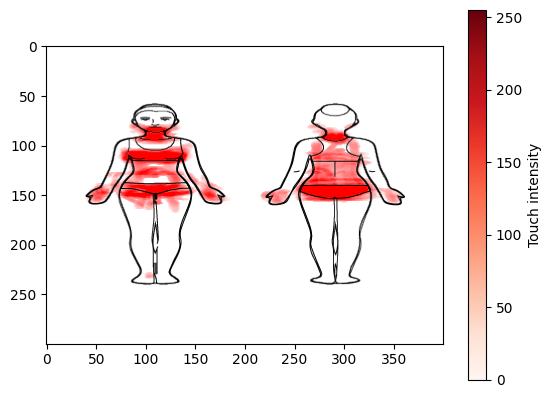

In [124]:
w = 800
h = 300

new_r = 0
new_b = 0
new_g = 0
new_a = 0

dbug = 1

for x, target in enumerate(all_dir):  #load each directory (Men and Women)
    name = target.split('/')[2]
    print('Working on "', name, '"')

    for r, d, f in os.walk(target):

        new_image = Image.new(mode="RGBA", size=(800, 300))  #create empty image
        merge_pixels = new_image.load()

        for file in f:
            if file.endswith('.png'):
                # print(file)
                dbug += 1
                im = Image.open(os.path.join(r, file))
                im_pixels = im.load()  #load pixels from input image
                out_pixels = im.load()  #load pixels again, these will be replaced
                intensity = calculateHighest(im_pixels, w, h)  #estimate the highest value of intensity (A-band)
                for i in range(w):
                    for j in range(h):
                        out_pixels[i, j] = intensityNormalization(im_pixels[i, j],
                                                                  intensity)  #Normalize A-band for each pixel

            # print(out_pixels)
            for i in range(w):
                for j in range(h):
                    if out_pixels[i, j][0] == 255:
                        new_r = merge_pixels[i, j][
                                    0] + 1  #if there is match, there will be more increase in number of r, above 1 means match
                        new_b = 0
                        new_g = 0
                        new_a = merge_pixels[i, j][3] + out_pixels[i, j][
                            3]  #keep adding the value of A-band, this will be useful for heatmap and tmap
                        new_pixel = (new_r, new_b, new_g, new_a)
                        merge_pixels[i, j] = new_pixel

        new_image.save('output/merge/' + name + ".png", "png")  #save results
        correct_color = Image.open(
            'output/merge/' + name + ".png")  #now lets delete those pixels that we dont want (R<1)
        img_array = np.array(correct_color)

        r = img_array[:, :, 0]

        mask_high = r > 1
        mask_low = r <= 1

        img_array[mask_high, 0] = 255
        img_array[mask_low, 0] = 0
        img_array[mask_low, 3] = 0

        new_img = Image.fromarray(img_array)
        if x <= 3:
            body_outline = Image.open(target_outline[0])
        else:
            body_outline = Image.open(target_outline[1])

        new_img.save('output/merge/' + name + ".png", "png")  #final result
        draw_outline(body_outline, name)

